In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
from shapely.geometry import Point

from sklearn.cluster import KMeans


In [2]:
pd.set_option('display.max_columns', None)

<h3>Datos

In [3]:
datos_sub = pd.read_csv('Datos/Datos_de_calidad_del_agua_2020/Datos_de_calidad_del_agua_de_sitios_de_monitoreo_de_aguas_subterraneas_2020.csv', encoding= 'latin-1')
datos_sub


,CLAVE,SITIO,ORGANISMO_DE_CUENCA,ESTADO,MUNICIPIO,ACUIFERO,SUBTIPO,LONGITUD,LATITUD,PERIODO,ALC_mg/L,CALIDAD_ALC,CONDUCT_mS/cm,CALIDAD_CONDUC,SDT_mg/L,SDT_M_mg/L,CALIDAD_SDT_ra,CALIDAD_SDT_salin,FLUORUROS_mg/L,CALIDAD_FLUO,DUR_mg/L,CALIDAD_DUR,COLI_FEC_NMP/100_mL,CALIDAD_COLI_FEC,N_NO3_mg/L,CALIDAD_N_NO3,AS_TOT_mg/L,CALIDAD_AS,CD_TOT_mg/L,CALIDAD_CD,CR_TOT_mg/L,CALIDAD_CR,HG_TOT_mg/L,CALIDAD_HG,PB_TOT_mg/L,CALIDAD_PB,MN_TOT_mg/L,CALIDAD_MN,FE_TOT_mg/L,CALIDAD_FE,SEMAFORO,CONTAMINANTES,CUMPLE_CON_ALC,CUMPLE_CON_COND,CUMPLE_CON_SDT_ra,CUMPLE_CON_SDT_salin,CUMPLE_CON_FLUO,CUMPLE_CON_DUR,CUMPLE_CON_CF,CUMPLE_CON_NO3,CUMPLE_CON_AS,CUMPLE_CON_CD,CUMPLE_CON_CR,CUMPLE_CON_HG,CUMPLE_CON_PB,CUMPLE_CON_MN,CUMPLE_CON_FE
0,DLAGU6,POZO SAN GIL,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,ASIENTOS,VALLE DE CHICALOTE,POZO,-102.02210,22.20887,2020,229.990,Alta,940.0,Permisible para riego,NaN,603.6,Cultivos sensibles,Potable - Dulce,0.9766,Potable - Optima,213.732,Potable - Dura,<1.1,Potable - Excelente,4.184656,Potable - Excelente,0.0161,Apta como FAAP,<0.003,Potable - Excelente,<0.005,Potable - Excelente,<0.0005,Potable - Excelente,<0.005,Potable - Excelente,<0.0015,Potable - Excelente,0.0891,Potable - Excelente,Verde,NaN,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
1,DLAGU6516,POZO R013 CAÑADA HONDA,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,AGUASCALIENTES,VALLE DE CHICALOTE,POZO,-102.20075,21.99958,2020,231.990,Alta,608.0,Buena para riego,NaN,445.4,Excelente para riego,Potable - Dulce,0.9298,Potable - Optima,185.0514,Potable - Dura,<1.1,Potable - Excelente,5.75011,Potable - Buena calidad,0.0134,Apta como FAAP,<0.003,Potable - Excelente,<0.005,Potable - Excelente,<0.0005,Potable - Excelente,<0.005,Potable - Excelente,<0.0015,Potable - Excelente,<0.025,Potable - Excelente,Verde,NaN,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
2,DLAGU7,POZO COSIO,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,COSIO,VALLE DE AGUASCALIENTES,POZO,-102.28801,22.36685,2020,204.920,Alta,532.0,Buena para riego,NaN,342,Excelente para riego,Potable - Dulce,1.8045,Alta,120.719,Potable - Dura,<1.1,Potable - Excelente,1.449803,Potable - Excelente,0.037,No apta como FAAP,<0.003,Potable - Excelente,<0.005,Potable - Excelente,<0.0005,Potable - Excelente,<0.005,Potable - Excelente,<0.0015,Potable - Excelente,<0.025,Potable - Excelente,Rojo,"FLUO,AS,",SI,SI,SI,SI,NO,SI,SI,SI,NO,SI,SI,SI,SI,SI,SI
3,DLAGU9,POZO EL SALITRILLO,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,RINCON DE ROMOS,VALLE DE AGUASCALIENTES,POZO,-102.29449,22.18435,2020,327.000,Alta,686.0,Buena para riego,NaN,478.6,Excelente para riego,Potable - Dulce,1.1229,Potable - Optima,199.879,Potable - Dura,<1.1,Potable - Excelente,1.258597,Potable - Excelente,0.0154,Apta como FAAP,<0.003,Potable - Excelente,0.005,Potable - Excelente,<0.0005,Potable - Excelente,<0.005,Potable - Excelente,<0.0015,Potable - Excelente,<0.025,Potable - Excelente,Verde,NaN,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
4,DLBAJ107,RANCHO EL TECOLOTE,PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LA PAZ,TODOS SANTOS,POZO,-110.24480,23.45138,2020,309.885,Alta,1841.0,Permisible para riego,NaN,1179,Cultivos con manejo especial,Ligeramente salobres,0.2343,Baja,476.9872,Potable - Dura,291,Aceptable,15.672251,No apta como FAAP,<0.01,Potable - Excelente,<0.003,Potable - Excelente,<0.005,Potable - Excelente,<0.0005,Potable - Excelente,<0.005,Potable - Excelente,<0.0015,Potable - Excelente,<0.025,Potable - Excelente,Rojo,"NO3,",SI,SI,SI,SI,SI,SI,SI,NO,SI,SI,SI,SI,SI,SI,SI
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1063,OCRBR5101M1,L-310 (COMUNIDAD SAN MANUEL),RIO BRAVO,NUEVO LEON,LINARES,CITRICOLA SUR,POZO,-99.54191,24.76036,2020,231.045,Alta,2350.0,Dudosa para riego,NaN,1545.8,Cultivos con manejo especial,Ligeramente salobres,<0.2,Baja,752.096,Muy dura e indeseable usos industrial y domesti

In [4]:
datos_sub.isna().sum()

CLAVE                      0
SITIO                      0
ORGANISMO_DE_CUENCA        0
ESTADO                     0
MUNICIPIO                  0
ACUIFERO                   0
SUBTIPO                    0
LONGITUD                   0
LATITUD                    0
PERIODO                    0
ALC_mg/L                   4
CALIDAD_ALC                4
CONDUCT_mS/cm              6
CALIDAD_CONDUC             6
SDT_mg/L                1068
SDT_M_mg/L                 2
CALIDAD_SDT_ra             2
CALIDAD_SDT_salin          2
FLUORUROS_mg/L             0
CALIDAD_FLUO               0
DUR_mg/L                   1
CALIDAD_DUR                1
COLI_FEC_NMP/100_mL        0
CALIDAD_COLI_FEC           0
N_NO3_mg/L                 1
CALIDAD_N_NO3              1
AS_TOT_mg/L                0
CALIDAD_AS                 0
CD_TOT_mg/L                0
CALIDAD_CD                 0
CR_TOT_mg/L                0
CALIDAD_CR                 0
HG_TOT_mg/L                0
CALIDAD_HG                 0
PB_TOT_mg/L   

In [5]:
datos_sup = pd.read_csv('Datos/Datos_de_calidad_del_agua_2020/Datos_de_calidad_del_agua_de_sitios_de_monitoreo_de_aguas_superficiales_2020.csv', encoding= 'latin-1')
datos_sup


,CLAVE,SITIO,ORGANISMO_DE_CUENCA,ESTADO,MUNICIPIO,CUENCA,CUERPO DE AGUA,TIPO,SUBTIPO,LONGITUD,LATITUD,PERIODO,DBO_mg/L,CALIDAD_DBO,DQO_mg/L,CALIDAD_DQO,SST_mg/L,CALIDAD_SST,COLI_FEC_NMP_100mL,CALIDAD_COLI_FEC,E_COLI_NMP_100mL,CALIDAD_E_COLI,ENTEROC_NMP_100mL,CALIDAD_ENTEROC,OD_PORC,CALIDAD_OD_PORC,OD_PORC_SUP,CALIDAD_OD_PORC_SUP,OD_PORC_MED,CALIDAD_OD_PORC_MED,OD_PORC_FON,CALIDAD_OD_PORC_FON,TOX_D_48_UT,CALIDAD_TOX_D_48,TOX_V_15_UT,CALIDAD_TOX_V_15,TOX_D_48_SUP_UT,CALIDAD TOX_D_48_SUP,TOX_D_48_FON_UT,CALIDAD_TOX_D_48_FON,TOX_FIS_SUP_15_UT,CALIDAD_TOX_FIS_SUP_15,TOX_FIS_FON_15_UT,CALIDAD_TOX_FIS_FON_15,SEMAFORO,CONTAMINANTES,CUMPLE_CON_DBO,CUMPLE_CON_DQO,CUMPLE_CON_SST,CUMPLE_CON_CF,CUMPLE_CON_E_COLI,CUMPLE_CON_ENTEROC,CUMPLE_CON_OD,CUMPLE_CON_TOX,GRUPO
0,DLAGU8,PRESA EL SAUCILLO 100M AGUAS ARRIBA DE LA CORTINA,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,RINCON DE ROMOS,RIO SAN PEDRO,PRESA EL SAUCILLO,LENTICO,PRESA,-102.33911,22.24730,2020.0,6,Buena calidad,54.08,Contaminada,13.75,Excelente,1162,Contaminada,98,Excelente,NaN,NaN,NaN,NaN,46.8,Aceptable,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<1,No Toxico,NaN,NaN,<1,No Toxico,NaN,NaN,Rojo,"DQO,CF,",SI,NO,SI,NO,SI,ND,SI,SI,LENTICO
1,DLBAJ100,"LOS CABOS SEG 22, 2 ISA10B",PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LOS CABOS,SAN JOSE DEL CABO,OCEANO PACIFICO,COSTERO,OCEANO-MAR,-109.84290,22.90473,2020.0,NaN,NaN,NaN,NaN,<10,Excelente,NaN,NaN,NaN,NaN,20,Excelente,NaN,NaN,92,Excelente,95.4,Excelente,92.2,Excelente,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<1,No Toxico,NaN,NaN,Verde,NaN,ND,ND,SI,ND,ND,SI,SI,SI,COSTERO
2,DLBAJ101,"LOS CABOS SEG 22, 1 ISA10B",PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LOS CABOS,SAN LUCAS,OCEANO PACIFICO,COSTERO,OCEANO-MAR,-109.86442,22.89880,2020.0,NaN,NaN,NaN,NaN,<10,Excelente,NaN,NaN,NaN,NaN,<3,Excelente,NaN,NaN,92,Excelente,95.4,Excelente,92.2,Excelente,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<1,No Toxico,NaN,NaN,Verde,NaN,ND,ND,SI,ND,ND,SI,SI,SI,COSTERO
3,DLBAJ102,LOS CABOS 3,PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LOS CABOS,SAN LUCAS,BAHIA SAN LUCAS,COSTERO,BAHIA,-109.88604,22.89609,2020.0,NaN,NaN,NaN,NaN,13.9667,Excelente,NaN,NaN,NaN,NaN,<3,Excelente,NaN,NaN,NaN,NaN,NaN,NaN,86.7,Excelente,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<1,No Toxico,NaN,NaN,Verde,NaN,ND,ND,SI,ND,ND,SI,SI,SI,COSTERO
4,DLBAJ103,LOS CABOS 1,PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LOS CABOS,SAN LUCAS,BAHIA SAN LUCAS,COSTERO,BAHIA,-109.89657,22.87694,2020.0,NaN,NaN,NaN,NaN,<10,Excelente,NaN,NaN,NaN,NaN,30,Excelente,NaN,NaN,96.2,Excelente,95.9,Excelente,95.5,Excelente,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<1,No Toxico,NaN,NaN,Verde,NaN,ND,ND,SI,ND,ND,SI,SI,SI,COSTERO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4136,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4137,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4138,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4139,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
datos_sup.isna().sum()

CLAVE                      648
SITIO                      648
ORGANISMO_DE_CUENCA        648
ESTADO                     648
MUNICIPIO                  648
CUENCA                     649
CUERPO DE AGUA             662
TIPO                       648
SUBTIPO                    662
LONGITUD                   648
LATITUD                    648
PERIODO                    648
DBO_mg/L                  1560
CALIDAD_DBO               1560
DQO_mg/L                  1560
CALIDAD_DQO               1560
SST_mg/L                   652
CALIDAD_SST                652
COLI_FEC_NMP_100mL        1559
CALIDAD_COLI_FEC          1559
E_COLI_NMP_100mL          1559
CALIDAD_E_COLI            1559
ENTEROC_NMP_100mL         3237
CALIDAD_ENTEROC           3237
OD_PORC                   2344
CALIDAD_OD_PORC           2344
OD_PORC_SUP               2522
CALIDAD_OD_PORC_SUP       2522
OD_PORC_MED               3654
CALIDAD_OD_PORC_MED       3654
OD_PORC_FON               3195
CALIDAD_OD_PORC_FON       3195
TOX_D_48

De ahora en adelante trabajaremos con el dataset de aguas subterraneas, ya que cuenta con una menor cantidad de datos faltantes

In [7]:
df_sub = datos_sub

<h3>Limpieza del dataset

In [8]:
df_sub.drop(columns=['SDT_mg/L','CONTAMINANTES'], inplace= True)
df_sub.dropna(inplace=True)

In [9]:
df_sub.replace({'<': ''}, regex=True, inplace = True)
df_sub

,CLAVE,SITIO,ORGANISMO_DE_CUENCA,ESTADO,MUNICIPIO,ACUIFERO,SUBTIPO,LONGITUD,LATITUD,PERIODO,ALC_mg/L,CALIDAD_ALC,CONDUCT_mS/cm,CALIDAD_CONDUC,SDT_M_mg/L,CALIDAD_SDT_ra,CALIDAD_SDT_salin,FLUORUROS_mg/L,CALIDAD_FLUO,DUR_mg/L,CALIDAD_DUR,COLI_FEC_NMP/100_mL,CALIDAD_COLI_FEC,N_NO3_mg/L,CALIDAD_N_NO3,AS_TOT_mg/L,CALIDAD_AS,CD_TOT_mg/L,CALIDAD_CD,CR_TOT_mg/L,CALIDAD_CR,HG_TOT_mg/L,CALIDAD_HG,PB_TOT_mg/L,CALIDAD_PB,MN_TOT_mg/L,CALIDAD_MN,FE_TOT_mg/L,CALIDAD_FE,SEMAFORO,CUMPLE_CON_ALC,CUMPLE_CON_COND,CUMPLE_CON_SDT_ra,CUMPLE_CON_SDT_salin,CUMPLE_CON_FLUO,CUMPLE_CON_DUR,CUMPLE_CON_CF,CUMPLE_CON_NO3,CUMPLE_CON_AS,CUMPLE_CON_CD,CUMPLE_CON_CR,CUMPLE_CON_HG,CUMPLE_CON_PB,CUMPLE_CON_MN,CUMPLE_CON_FE
0,DLAGU6,POZO SAN GIL,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,ASIENTOS,VALLE DE CHICALOTE,POZO,-102.02210,22.20887,2020,229.990,Alta,940.0,Permisible para riego,603.6,Cultivos sensibles,Potable - Dulce,0.9766,Potable - Optima,213.732,Potable - Dura,1.1,Potable - Excelente,4.184656,Potable - Excelente,0.0161,Apta como FAAP,0.003,Potable - Excelente,0.005,Potable - Excelente,0.0005,Potable - Excelente,0.005,Potable - Excelente,0.0015,Potable - Excelente,0.0891,Potable - Excelente,Verde,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
1,DLAGU6516,POZO R013 CAÑADA HONDA,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,AGUASCALIENTES,VALLE DE CHICALOTE,POZO,-102.20075,21.99958,2020,231.990,Alta,608.0,Buena para riego,445.4,Excelente para riego,Potable - Dulce,0.9298,Potable - Optima,185.0514,Potable - Dura,1.1,Potable - Excelente,5.75011,Potable - Buena calidad,0.0134,Apta como FAAP,0.003,Potable - Excelente,0.005,Potable - Excelente,0.0005,Potable - Excelente,0.005,Potable - Excelente,0.0015,Potable - Excelente,0.025,Potable - Excelente,Verde,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
2,DLAGU7,POZO COSIO,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,COSIO,VALLE DE AGUASCALIENTES,POZO,-102.28801,22.36685,2020,204.920,Alta,532.0,Buena para riego,342,Excelente para riego,Potable - Dulce,1.8045,Alta,120.719,Potable - Dura,1.1,Potable - Excelente,1.449803,Potable - Excelente,0.037,No apta como FAAP,0.003,Potable - Excelente,0.005,Potable - Excelente,0.0005,Potable - Excelente,0.005,Potable - Excelente,0.0015,Potable - Excelente,0.025,Potable - Excelente,Rojo,SI,SI,SI,SI,NO,SI,SI,SI,NO,SI,SI,SI,SI,SI,SI
3,DLAGU9,POZO EL SALITRILLO,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,RINCON DE ROMOS,VALLE DE AGUASCALIENTES,POZO,-102.29449,22.18435,2020,327.000,Alta,686.0,Buena para riego,478.6,Excelente para riego,Potable - Dulce,1.1229,Potable - Optima,199.879,Potable - Dura,1.1,Potable - Excelente,1.258597,Potable - Excelente,0.0154,Apta como FAAP,0.003,Potable - Excelente,0.005,Potable - Excelente,0.0005,Potable - Excelente,0.005,Potable - Excelente,0.0015,Potable - Excelente,0.025,Potable - Excelente,Verde,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
4,DLBAJ107,RANCHO EL TECOLOTE,PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LA PAZ,TODOS SANTOS,POZO,-110.24480,23.45138,2020,309.885,Alta,1841.0,Permisible para riego,1179,Cultivos con manejo especial,Ligeramente salobres,0.2343,Baja,476.9872,Potable - Dura,291,Aceptable,15.672251,No apta como FAAP,0.01,Potable - Excelente,0.003,Potable - Excelente,0.005,Potable - Excelente,0.0005,Potable - Excelente,0.005,Potable - Excelente,0.0015,Potable - Excelente,0.025,Potable - Excelente,Rojo,SI,SI,SI,SI,SI,SI,SI,NO,SI,SI,SI,SI,SI,SI,SI
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1063,OCRBR5101M1,L-310 (COMUNIDAD SAN MANUEL),RIO BRAVO,NUEVO LEON,LINARES,CITRICOLA SUR,POZO,-99.54191,24.76036,2020,231.045,Alta,2350.0,Dudosa para riego,1545.8,Cultivos con manejo especial,Ligeramente salobres,0.2,Baja,752.096,Muy dura e indeseable usos industrial y domestico,1.1,Potable - Excelente,14.615488,No apta como FAAP,0.01,Potable - Excelente,0.003,Potable - Excelente,0.005,Potable

In [10]:
df_columns = df_sub.columns

for col in df_columns:
    try:
        df_sub[col] = df_sub[col].astype('float')
    except:
        df_sub[col] = df_sub[col].astype('str')

df_sub.dtypes

CLAVE                    object
SITIO                    object
ORGANISMO_DE_CUENCA      object
ESTADO                   object
MUNICIPIO                object
ACUIFERO                 object
SUBTIPO                  object
LONGITUD                float64
LATITUD                 float64
PERIODO                 float64
ALC_mg/L                float64
CALIDAD_ALC              object
CONDUCT_mS/cm           float64
CALIDAD_CONDUC           object
SDT_M_mg/L              float64
CALIDAD_SDT_ra           object
CALIDAD_SDT_salin        object
FLUORUROS_mg/L          float64
CALIDAD_FLUO             object
DUR_mg/L                float64
CALIDAD_DUR              object
COLI_FEC_NMP/100_mL     float64
CALIDAD_COLI_FEC         object
N_NO3_mg/L              float64
CALIDAD_N_NO3            object
AS_TOT_mg/L             float64
CALIDAD_AS               object
CD_TOT_mg/L             float64
CALIDAD_CD               object
CR_TOT_mg/L             float64
CALIDAD_CR               object
HG_TOT_m

In [11]:
df_sub.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
CLAVE,1054,1054,DLAGU6,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SITIO,1054,1052,POZO VILLA UNION,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ORGANISMO_DE_CUENCA,1054,13,CUENCAS CENTRALES DEL NORTE,231,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ESTADO,1054,32,DURANGO,119,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MUNICIPIO,1054,447,LA PAZ,26,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ACUIFERO,1054,272,PENINSULA DE YUCATAN,119,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SUBTIPO,1054,8,POZO,1025,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LONGITUD,1054.0,NaN,NaN,NaN,-101.84827,6.697568,-116.66425,-105.38517,-102.170665,-98.971268,-86.86412
LATITUD,1054.0,NaN,NaN,NaN,23.161796,3.875005,14.56115,20.224857,22.640705,25.50877,32.677713
PERIODO,1054.0,NaN,NaN,NaN,2020.0,0.0,2020.0,2020.0,2020.0,2020.0,2020.0


<h3>EDA

In [12]:
#!python -m pip install pandas-profiling

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

/Users/64460/opt/anaconda3/lib/python3.9/site-packages/missingno/missingno.py:254: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(
/Users/64460/opt/anaconda3/lib/python3.9/site-packages/pandas_profiling/model/missing.py:89: UserWarning: There was an attempt to generate the Count missing values diagrams, but this failed.
To hide this warning, disable the calculation
(using `df.profile_report(missing_diagrams={"Count": False}`)
If this is problematic for your use case, please report this as an issue:
https://github.com/ydataai/pandas-profiling/issues
(include the error message: 'The number of FixedLocator locations (7), usually from a call to set_ticks, does not match the number of ticklabels (56).')
  warnings.warn(


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

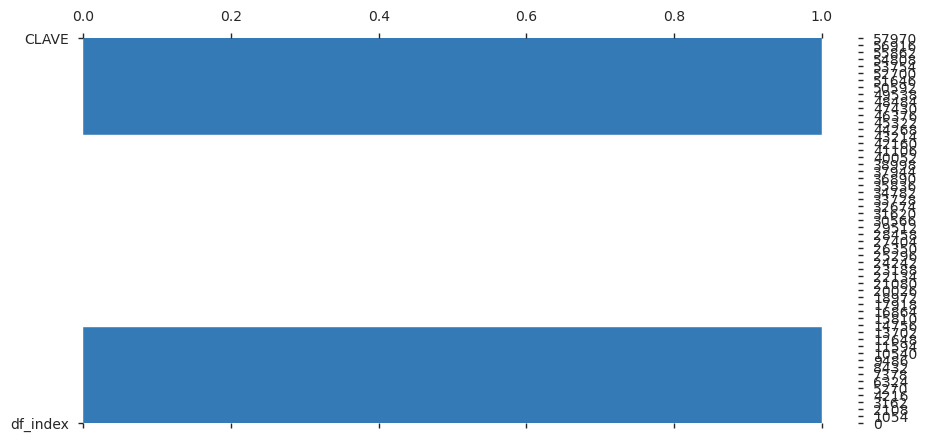

In [13]:
from pandas_profiling import ProfileReport

profile = ProfileReport(df_sub, title="Pandas Profiling Report")
profile.to_file(output_file='report.html')


In [14]:
#!python -m pip install autoviz

In [ ]:
from autoviz.AutoViz_Class import AutoViz_Class
AV = AutoViz_Class()
%matplotlib inline
#you have to specify the target variable
dft = AV.AutoViz(filename='',dfte=df_sub, depVar = 'SEMAFORO')

<h3>Kmeans

In [24]:
df_cord = df_sub[['LONGITUD', 'LATITUD']]
df_cord['Coordinates'] = list(zip(df_cord.LONGITUD, df_cord.LATITUD))
df_cord['Coordinates'] = df_cord['Coordinates'].apply(Point)
df_cord.head(5)

,LONGITUD,LATITUD,Coordinates
0,-102.02210,22.20887,POINT (-102.0221 22.20887)
1,-102.20075,21.99958,POINT (-102.20075 21.99958)
2,-102.28801,22.36685,POINT (-102.28801 22.36685)
3,-102.29449,22.18435,POINT (-102.29449 22.18435)
4,-110.24480,23.45138,POINT (-110.2448 23.45138)


In [25]:
gdf = gpd.GeoDataFrame(df_cord, geometry='Coordinates')
gdf.head(5)

,LONGITUD,LATITUD,Coordinates
0,-102.02210,22.20887,POINT (-102.02210 22.20887)
1,-102.20075,21.99958,POINT (-102.20075 21.99958)
2,-102.28801,22.36685,POINT (-102.28801 22.36685)
3,-102.29449,22.18435,POINT (-102.29449 22.18435)
4,-110.24480,23.45138,POINT (-110.24480 23.45138)


In [30]:
#Mapa
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world = world.set_index('iso_a3')
world.name.unique()

array(['Fiji', 'Tanzania', 'W. Sahara', 'Canada',
       'United States of America', 'Kazakhstan', 'Uzbekistan',
       'Papua New Guinea', 'Indonesia', 'Argentina', 'Chile',
       'Dem. Rep. Congo', 'Somalia', 'Kenya', 'Sudan', 'Chad', 'Haiti',
       'Dominican Rep.', 'Russia', 'Bahamas', 'Falkland Is.', 'Norway',
       'Greenland', 'Fr. S. Antarctic Lands', 'Timor-Leste',
       'South Africa', 'Lesotho', 'Mexico', 'Uruguay', 'Brazil',
       'Bolivia', 'Peru', 'Colombia', 'Panama', 'Costa Rica', 'Nicaragua',
       'Honduras', 'El Salvador', 'Guatemala', 'Belize', 'Venezuela',
       'Guyana', 'Suriname', 'France', 'Ecuador', 'Puerto Rico',
       'Jamaica', 'Cuba', 'Zimbabwe', 'Botswana', 'Namibia', 'Senegal',
       'Mali', 'Mauritania', 'Benin', 'Niger', 'Nigeria', 'Cameroon',
       'Togo', 'Ghana', "Côte d'Ivoire", 'Guinea', 'Guinea-Bissau',
       'Liberia', 'Sierra Leone', 'Burkina Faso', 'Central African Rep.',
       'Congo', 'Gabon', 'Eq. Guinea', 'Zambia', 'Malawi', 'M

Text(34.972222222222214, 0.5, 'latitude')

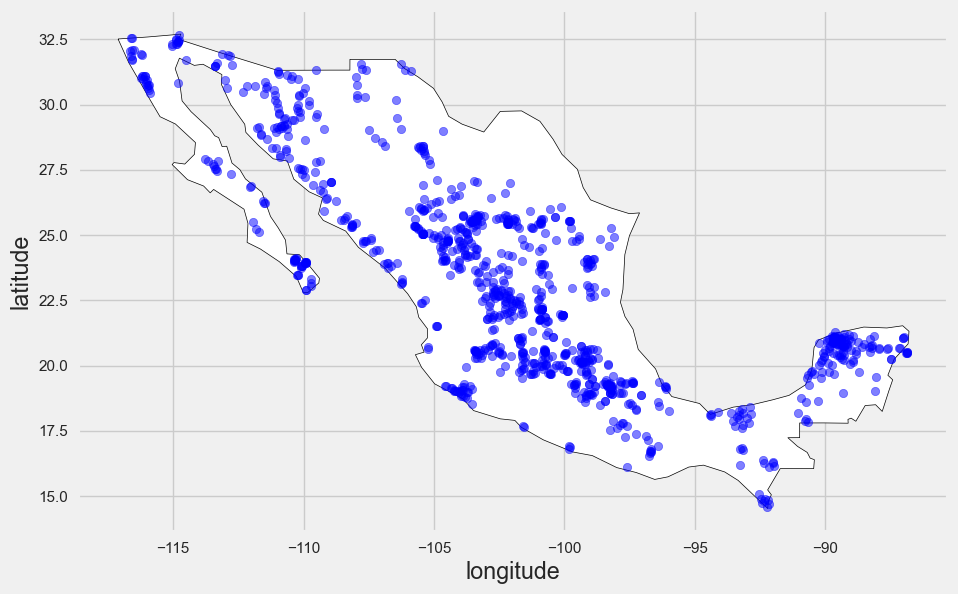

In [32]:
fig, gax = plt.subplots(figsize = (10,10))

world.query('name == "Mexico"').plot(ax=gax, edgecolor = 'black', color = 'white')
gdf.plot(ax=gax, color = 'blue', marker='o', alpha = 0.5)
gax.set_xlabel('longitude')
gax.set_ylabel('latitude')


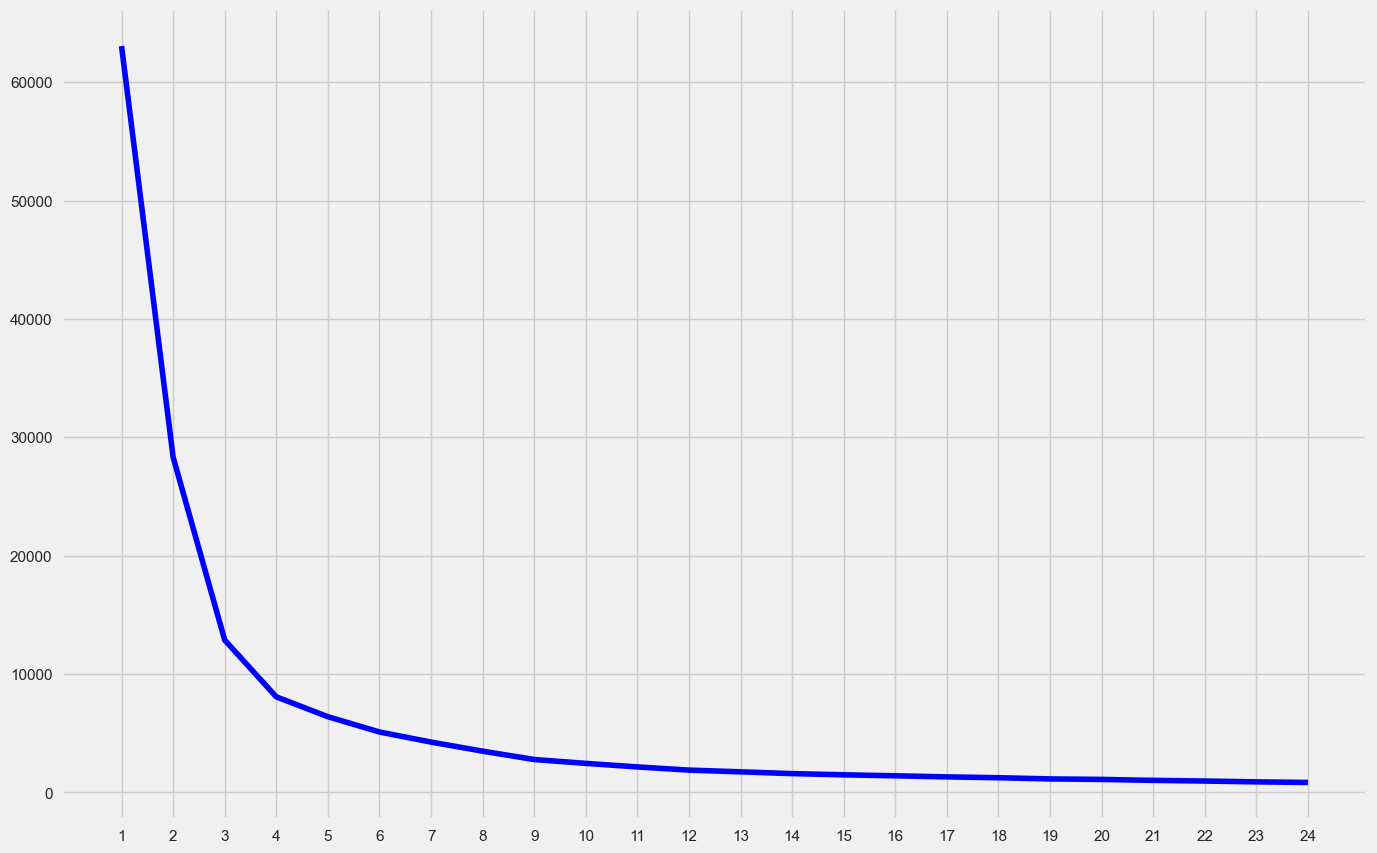

In [38]:
#Elbow
fig, gax = plt.subplots(figsize = (15,10))
scores = []

for i in range(1,25):
    kmeans_cluster = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans_cluster.fit(df_cord[['LONGITUD','LATITUD']])
    scores.append(kmeans_cluster.inertia_)

sns.lineplot(ax = gax, x = range(1,25), y= scores, color = 'blue')
plt.xticks(range(1,25))
plt.show()



Se utilizarán 9 clusters

In [395]:
import matplotlib.colors as mcolors
import matplotlib as mpl


dic_colors = {'color1': '#800080',
              'color2': '#9d78be',
              'color3': '#e3a9c1',
              'color4': '#aaaaaa',
              'color5': '#3815ef',
              'color6': '#0a98dd',
              'color7': '#c39797',
              'color8': '#6666ff',
              'color9': '#02035e'}
dic_list = list(dic_colors.keys())
dic_colors[dic_list[1]]

'#9d78be'

Text(34.972222222222214, 0.5, 'latitude')

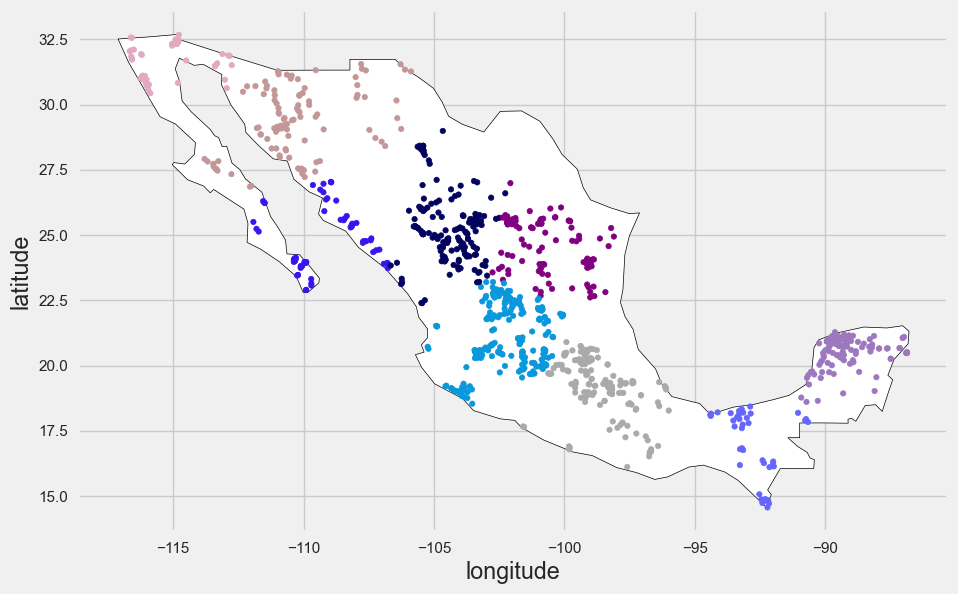

In [396]:
kmeans = KMeans(n_clusters= 9, random_state= 49).fit(df_cord[['LONGITUD','LATITUD']])
centroids = kmeans.cluster_centers_

labels = kmeans.predict(df_cord[['LONGITUD','LATITUD']])
asignar= []

for row in labels:
    asignar.append(dic_colors[dic_list[row]])

fig, gax = plt.subplots(figsize = (10,10))

world.query('name == "Mexico"').plot(ax=gax, edgecolor = 'black', color = 'white')
gdf.plot(ax=gax, color = asignar, marker='o', markersize=15, alpha = 1)
gax.set_xlabel('longitude')
gax.set_ylabel('latitude')

Text(74.97222222222221, 0.5, 'latitude')

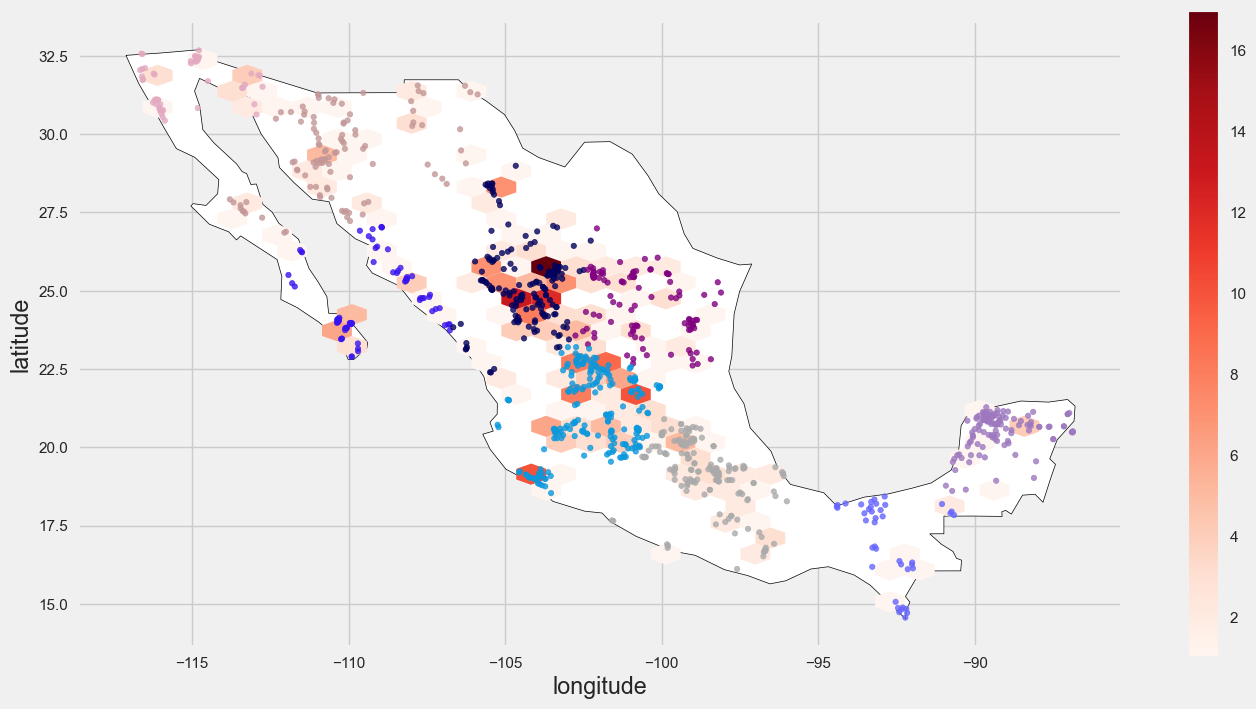

In [397]:
fig, gax = plt.subplots(figsize = (15,8))

world.query('name == "Mexico"').plot(ax=gax, edgecolor = 'black', color = 'white')
im = gdf[df_sub['SEMAFORO'] == 'Rojo'].plot(ax=gax, x='LONGITUD', y='LATITUD', kind = 'hexbin', gridsize = 30, alpha = 1, edgecolor = 'none', mincnt = 1, colormap= 'Reds')
gdf.plot(ax=gax, color = asignar, marker='o', markersize=15, alpha = 0.8)
gax.set_xlabel('longitude')
gax.set_ylabel('latitude')
#plt.colorbar(im, fraction=0.046, pad=0.04)

In [398]:
df_sub['SEMAFORO'].value_counts()


Verde       427
Rojo        382
Amarillo    245
Name: SEMAFORO, dtype: int64

Text(74.97222222222221, 0.5, 'latitude')

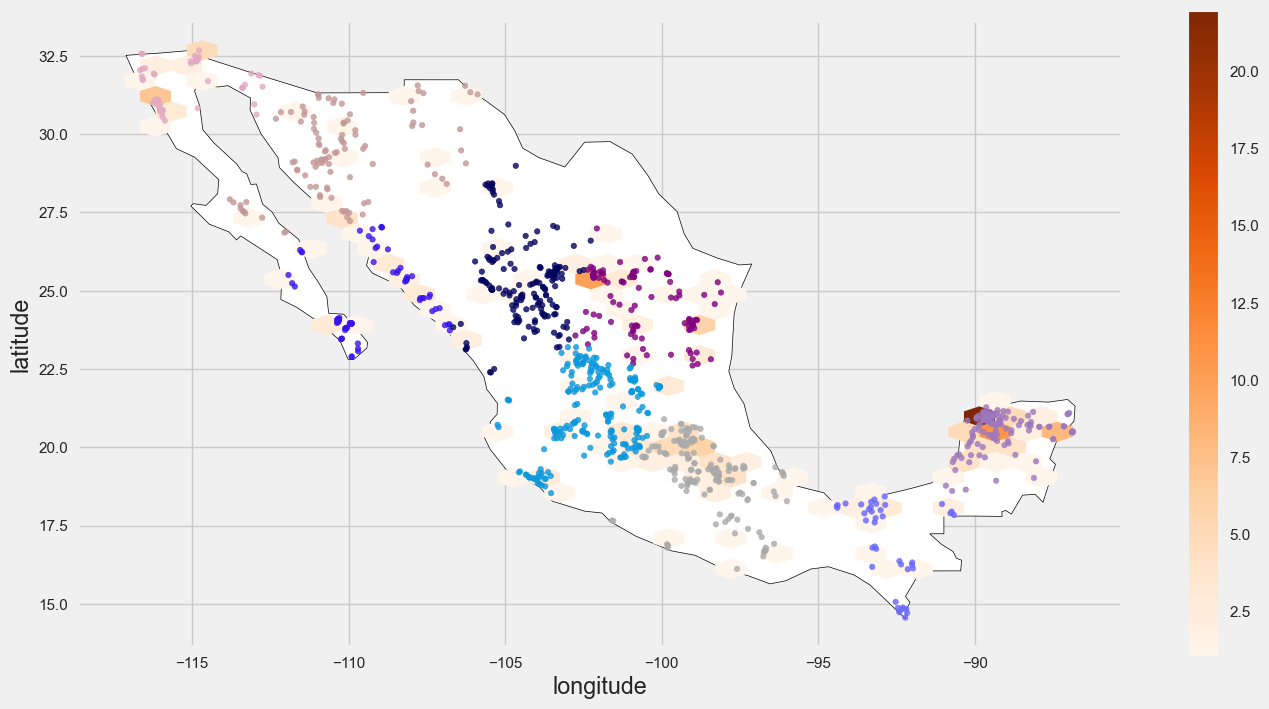

In [399]:
fig, gax = plt.subplots(figsize = (15,8))

world.query('name == "Mexico"').plot(ax=gax, edgecolor = 'black', color = 'white')
im = gdf[df_sub['SEMAFORO'] == 'Amarillo'].plot(ax=gax, x='LONGITUD', y='LATITUD', kind = 'hexbin', gridsize = 30, alpha = 1, edgecolor = 'none', mincnt = 1, colormap= 'Oranges')
gdf.plot(ax=gax, color = asignar, marker='o', markersize=15, alpha = 0.8)
gax.set_xlabel('longitude')
gax.set_ylabel('latitude')

Text(74.97222222222221, 0.5, 'latitude')

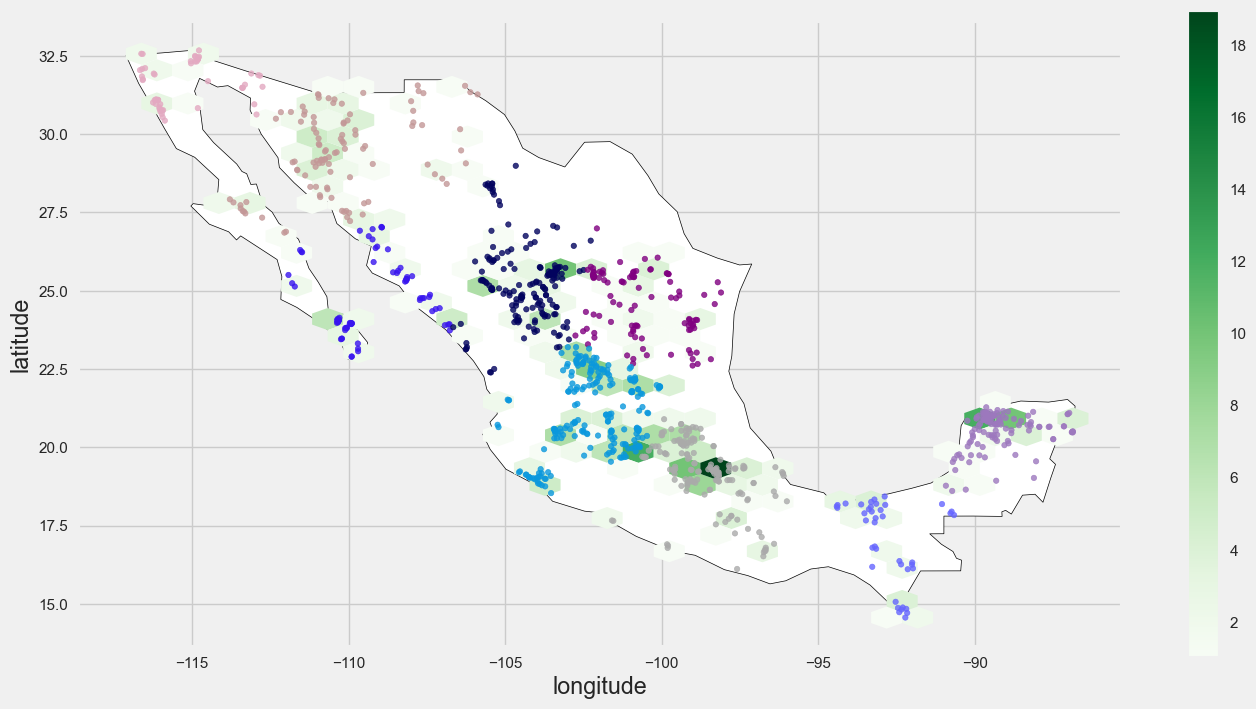

In [400]:
fig, gax = plt.subplots(figsize = (15,8))

world.query('name == "Mexico"').plot(ax=gax, edgecolor = 'black', color = 'white')
im = gdf[df_sub['SEMAFORO'] == 'Verde'].plot(ax=gax, x='LONGITUD', y='LATITUD', kind = 'hexbin', gridsize = 30, alpha = 1, edgecolor = 'none', mincnt = 1, colormap= 'Greens')
gdf.plot(ax=gax, color = asignar, marker='o', markersize=15, alpha = 0.8)
gax.set_xlabel('longitude')
gax.set_ylabel('latitude')

Text(1690.2663398692807, 0.5, '')

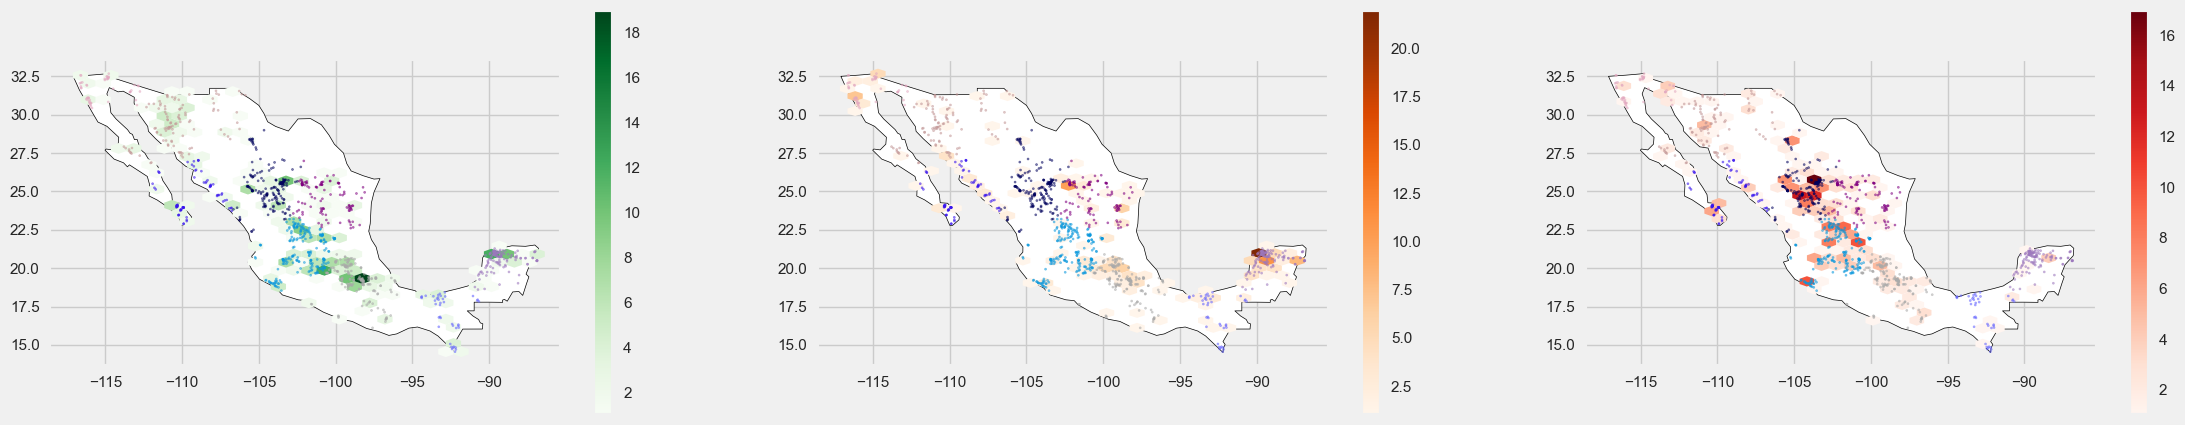

In [401]:
fig, gax = plt.subplots(1,3,figsize = (25,5))

world.query('name == "Mexico"').plot(ax=gax[0], edgecolor = 'black', color = 'white')
im = gdf[df_sub['SEMAFORO'] == 'Verde'].plot(ax=gax[0], x='LONGITUD', y='LATITUD', kind = 'hexbin', gridsize = 30, alpha = 1, edgecolor = 'none', mincnt = 1, colormap= 'Greens')
gdf.plot(ax=gax[0], color = asignar, marker='o', markersize=2, alpha = 0.5)
gax[0].set_xlabel('')
gax[0].set_ylabel('')

world.query('name == "Mexico"').plot(ax=gax[1], edgecolor = 'black', color = 'white')
im = gdf[df_sub['SEMAFORO'] == 'Amarillo'].plot(ax=gax[1], x='LONGITUD', y='LATITUD', kind = 'hexbin', gridsize = 30, alpha = 1, edgecolor = 'none', mincnt = 1, colormap= 'Oranges')
gdf.plot(ax=gax[1], color = asignar, marker='o', markersize=2, alpha = 0.5)
gax[1].set_xlabel('')
gax[1].set_ylabel('')

world.query('name == "Mexico"').plot(ax=gax[2], edgecolor = 'black', color = 'white')
im = gdf[df_sub['SEMAFORO'] == 'Rojo'].plot(ax=gax[2], x='LONGITUD', y='LATITUD', kind = 'hexbin', gridsize = 30, alpha = 1, edgecolor = 'none', mincnt = 1, colormap= 'Reds')
gdf.plot(ax=gax[2], color = asignar, marker='o', markersize=2, alpha = 0.5)
gax[2].set_xlabel('')
gax[2].set_ylabel('')


In [402]:
labels

array([5, 5, 5, ..., 0, 0, 0], dtype=int32)

In [405]:
df_sub['clusters'] = labels
pd.DataFrame(df_sub['clusters'].value_counts()).index

Int64Index([5, 8, 3, 1, 0, 6, 4, 2, 7], dtype='int64')

In [407]:
pd.DataFrame(df_sub[df_sub['clusters']==0]['SEMAFORO'].value_counts())

,SEMAFORO
Rojo,38
Amarillo,36
Verde,30


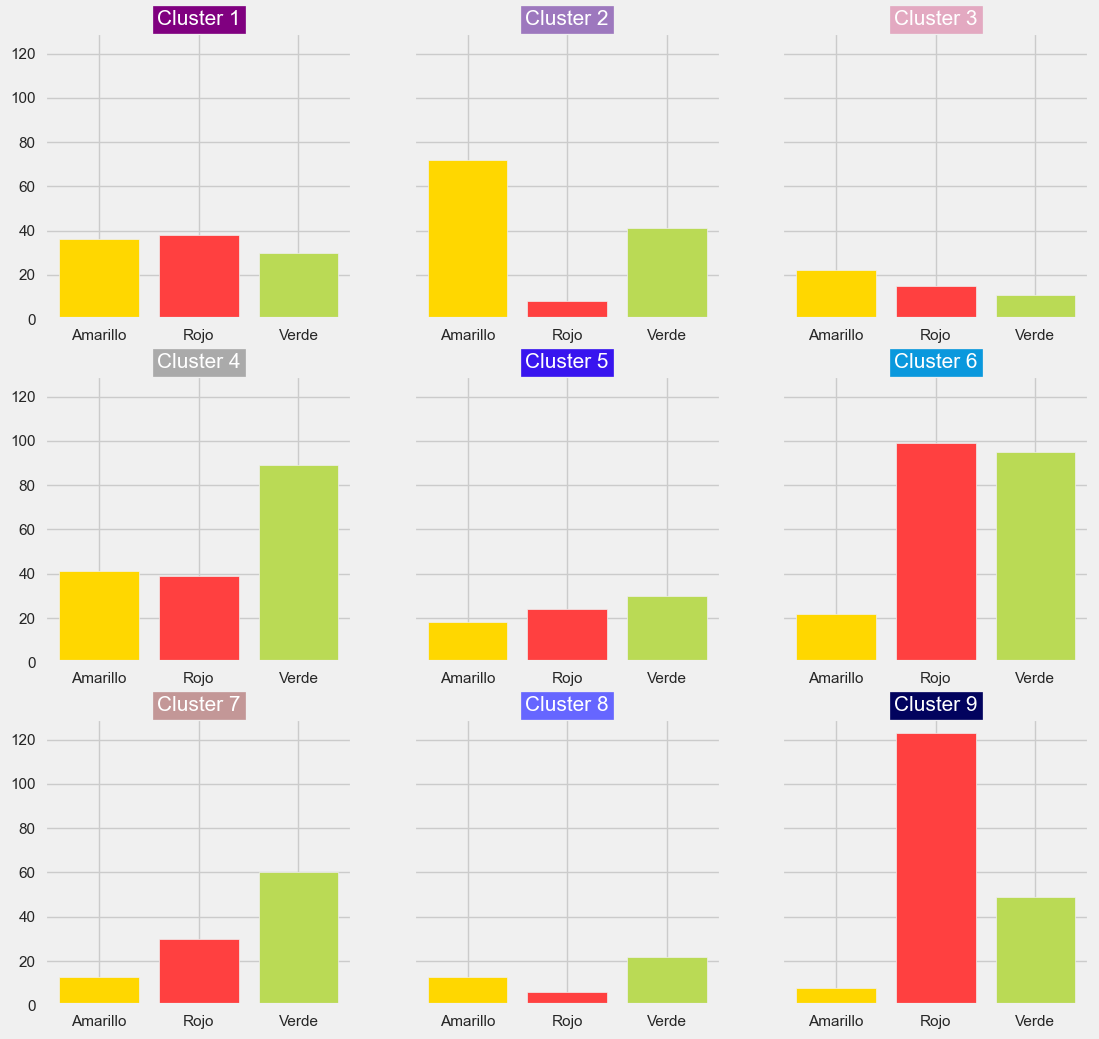

In [430]:
fig, ax = plt.subplots(3,3,figsize = (12, 12), sharey=True)

for i in range(0,9):

    df_a = pd.DataFrame(df_sub[df_sub['clusters']==i]['SEMAFORO'].value_counts())
    df_a.sort_index(inplace=True)

    x_pos = np.arange(len(df_a.index))
    plt.subplot( 3, 3, i +1)
    plt.bar(x_pos, df_a['SEMAFORO'], color= ['#ffd700', '#ff4040', '#bada55'] )
    plt.xticks(x_pos, df_a.index)
    plt.title('Cluster ' + str(i+1), color = 'white', backgroundcolor = dic_colors[dic_list[i]],fontsize = 15)

